In [3]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path
import random
import gc
import seaborn as sns

In [16]:
X_test_cnn = np.load(Path("../data/CNN/X_test_cnn.npy"))
X_train_cnn = np.load(Path("../data/CNN/X_train_cnn.npy"), allow_pickle=True)

X_test_cnn.shape

# Select a few random indices
num_images_to_show = 5
random_indices = random.sample(range(X_train_cnn.shape[0]), num_images_to_show)
# Clear unnessary variables to save the memory
gc.collect()

1217

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4158823700.0..41.06209].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.6056645..11.765796].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.7647057..14.262032].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.84273297..7.03268].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-26.382353..1.2546991].


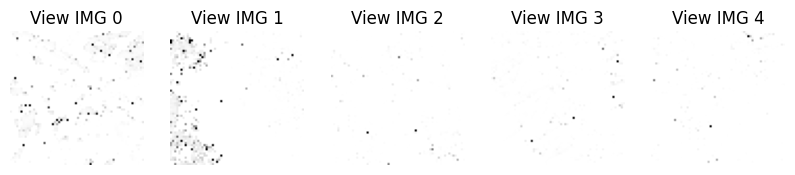

In [17]:
# Plot the images with labels
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(X_train_cnn[idx], cmap="RdYlGn")  # Adjust cmap if needed (e.g., remove it for RGB images)
    plt.title(f"View IMG {i}")
    plt.axis("off")

plt.show()

## Show main images

In [4]:
def mulsepc_img_view(multispectral_image_path, stage, ax_ndvi, ax_ndwi):
    # Open the multispectral image
    with rasterio.open(multispectral_image_path) as src:
        red_band = src.read(3).astype(np.float32)  # Assume RED is Band 3
        nir_band = src.read(4).astype(np.float32)  # Assume NIR is Band 4
        green_band = src.read(2).astype(np.float32)  # Assume GREEN is Band 2

        # Calculate NDVI and NDWI
        ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-6)
        ndwi = (green_band - nir_band) / (green_band + nir_band + 1e-6)
    
    # Plot NDVI
    ax_ndvi.set_title(f"{stage} - NDVI")
    ax_ndvi.imshow(ndvi, cmap='RdYlGn')
    ax_ndvi.axis("off")
    
    # Plot NDWI
    ax_ndwi.set_title(f"{stage} - NDWI")
    ax_ndwi.imshow(ndwi, cmap='Blues')
    ax_ndwi.axis("off")
    
    return np.mean(ndvi), np.mean(ndwi)

In [5]:
# Define paths
base = Path('../data/MULTISPECTRAL/')
stages = [
    ("GERMINATION", os.path.join(base, "germination/main/germination_main.tif")),
    ("TILLERING", os.path.join(base, "tillering/main/tillering_main.tif")),
    ("GRAND GROWTH", os.path.join(base, "grand_growth/main/grand_growth_main.tif")),
    ("RIPENING", os.path.join(base, "ripening/main/ripening_main.tif"))
]

# Clear unnessary variables to save the memory
gc.collect()

0

c:\Users\user\anaconda3\envs\research_env\lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


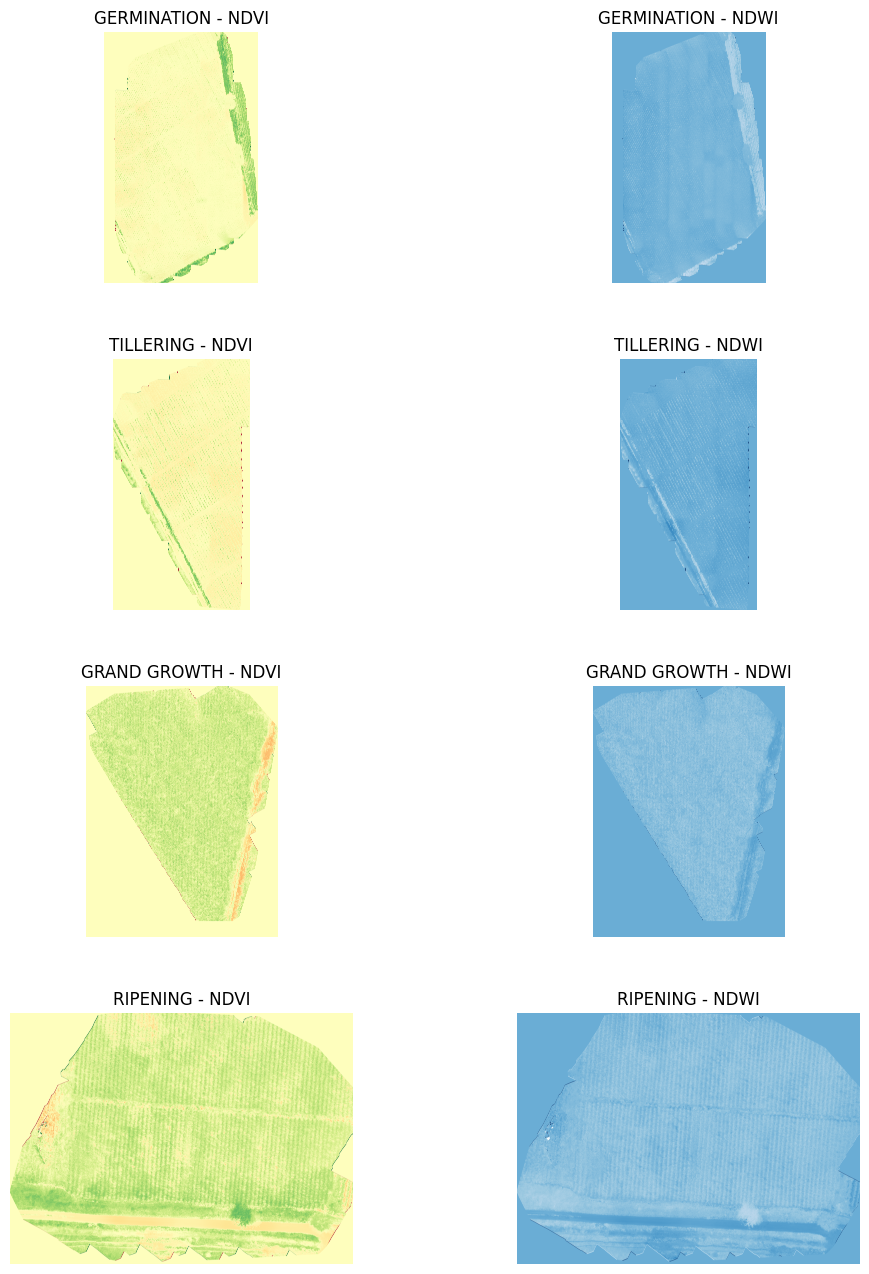

C:\Users\user\AppData\Local\Temp\ipykernel_3828\3785345637.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_labels, y=ndvi_values, palette="RdYlGn")


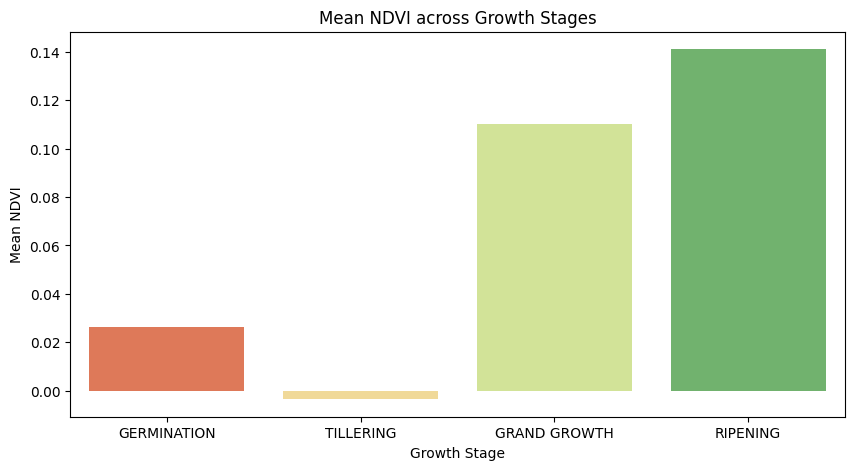

C:\Users\user\AppData\Local\Temp\ipykernel_3828\3785345637.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_labels, y=ndwi_values, palette="Blues")


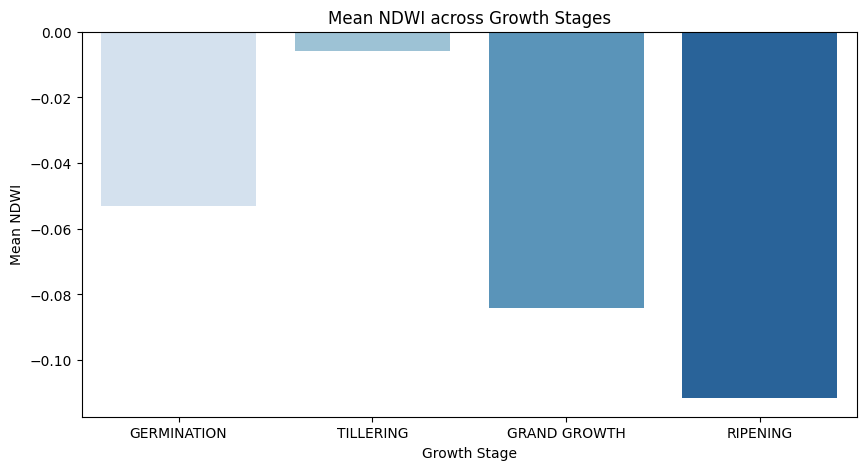

In [6]:
# Create figure with 4 rows and 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
plt.subplots_adjust(hspace=0.3)

ndvi_values = []
ndwi_values = []
stage_labels = []

# Process each stage
for i, (stage, path) in enumerate(stages):
    mean_ndvi, mean_ndwi = mulsepc_img_view(path, stage, axes[i, 0], axes[i, 1])
    ndvi_values.append(mean_ndvi)
    ndwi_values.append(mean_ndwi)
    stage_labels.append(stage)

# Clear unnessary variables to save the memory
gc.collect()

# Show the plots
plt.show()

# Create bar plots for Stage vs NDVI and Stage vs NDWI
plt.figure(figsize=(10, 5))
sns.barplot(x=stage_labels, y=ndvi_values, palette="RdYlGn")
plt.xlabel("Growth Stage")
plt.ylabel("Mean NDVI")
plt.title("Mean NDVI across Growth Stages")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=stage_labels, y=ndwi_values, palette="Blues")
plt.xlabel("Growth Stage")
plt.ylabel("Mean NDWI")
plt.title("Mean NDWI across Growth Stages")
plt.show()